In [42]:
# Import libraries and data
import pandas as pd
import numpy as np
from methods.cluster_algo import cluster_data

# Run clustering algorithm and assign clusters to our consumers
path = "data/coffee_survey.csv"
n_clusters = 4

df = cluster_data(path, n_clusters)

In [43]:
# Checking count of consumers in each segment
df["cluster"].value_counts().sort_index()

cluster
0    1132
1     583
2     855
3     435
Name: count, dtype: int64

In [44]:
# Checking which features dominate each customer segment
df.groupby("cluster").agg(lambda x: x.value_counts().index[0])

,age,favorite,where_drink,additions,style,cups,roast_level,expertise,caffeine,strength,...,know_source,most_paid,wfh,gender,total_spend,most_willing,spent_equipment,value_cafe,value_equipment,education_level
cluster,,,,,,,,,,,,,,,,,,,,,
0,25-34 years old,Pourover,At home,No - just black,Fruity,2,Light,7.0,Full caffeine,Somewhat strong,...,Yes,$8-$10,I primarily work from home,Male,$40-$60,More than $20,"More than $1,000",Yes,Yes,Bachelor's degree
1,25-34 years old,Pourover,At home,No - just black,Fruity,1,Light,7.0,Full caffeine,Medium,...,Yes,$6-$8,I primarily work from home,Male,$40-$60,$8-$10,"More than $1,000",No,Yes,Bachelor's degree
2,25-34 years old,Latte,At home,No - just black,Chocolatey,1,Medium,6.0,Full caffeine,Somewhat strong,...,Yes,$6-$8,I primarily work from home,Male,$20-$40,$8-$10,$100-$300,Yes,Yes,Bachelor's degree
3,25-34 years old,Pourover,At home,No - just black,Fruity,2,Light,6.0,Full caffeine,Medium,...,Yes,$6-$8,I primarily work from home,Male,$20-$40,$10-$15,$300-$500,No,Yes,Bachelor's degree


In [45]:
# Classify consumers based on willingness to pay for coffee, lets rerun clustering with these new data points

def parse_total_spend(x):
    if pd.isna(x):
        return None, None
    x = x.strip()
    if x == "$20-$40": return 20, 40
    elif x == "$40-$60": return 40, 60
    elif x == "$60-$80": return 60, 80
    elif x == "$80-$100": return 80, 100
    elif x == ">$100": return 100, None
    elif x == "<$20": return 1, 20
    else: return None, None

def parse_most_paid(x):
    if pd.isna(x):
        return None, None
    x = x.strip()
    if x == "$4-$6": return 4, 6
    elif x == "$6-$8": return 6, 8
    elif x == "$8-$10": return 8, 10
    elif x == "$10-$15": return 10, 15
    elif x == "More than $20": return 20, None
    else: return None, None

# Parse total spend
df[['min_total_spend', 'max_total_spend']] = df['total_spend'].apply(
    lambda x: pd.Series(parse_total_spend(x))
)

# Parse most paid
df[['min_most_paid', 'max_most_paid']] = df['most_paid'].apply(
    lambda x: pd.Series(parse_most_paid(x))
)

df.head(10)

,age,favorite,where_drink,additions,style,cups,roast_level,expertise,caffeine,strength,...,most_willing,spent_equipment,value_cafe,value_equipment,education_level,cluster,min_total_spend,max_total_spend,min_most_paid,max_most_paid
34,45-54 years old,Regular drip coffee,"At home, At the office, At a cafe, On the go",No - just black,Floral,2,Light,8.0,Full caffeine,Medium,...,$8-$10,$500-$1000,No,Yes,Master's degree,1,20.0,40.0,4.0,6.0
41,25-34 years old,Pourover,"At home, At the office",No - just black,Floral,2,Light,10.0,Full caffeine,Medium,...,More than $20,$50-$100,Yes,Yes,Master's degree,1,40.0,60.0,NaN,NaN
42,35-44 years old,Iced coffee,"At the office, At home",No - just black,Fruity,1,Light,6.0,Full caffeine,Very strong,...,More than $20,$100-$300,Yes,Yes,Bachelor's degree,0,20.0,40.0,10.0,15.0
43,45-54 years old,Pourover,At home,No - just black,Full Bodied,More than 4,Dark,7.0,Full caffeine,Somewhat strong,...,$15-$20,$300-$500,Yes,Yes,Bachelor's degree,0,40.0,60.0,10.0,15.0
46,35-44 years old,Cappuccino,"At a cafe, At home","Milk, dairy alternative, or coffee creamer",Floral,2,Blonde,4.0,Full caffeine,Somewhat strong,...,$4-$6,"More than $1,000",Yes,Yes,Less than high school,0,60.0,80.0,6.0,8.0
47,45-54 years old,Pourover,At home,No - just black,Fruity,2,Light,8.0,Full caffeine,Somewhat light,...,$8-$10,$100-$300,No,Yes,Bachelor's degree,3,100.0,NaN,6.0,8.0
48,35-44 years old,Latte,"At home, At the office","Milk, dairy alternative, or coffee creamer",Nutty,2,Medium,2.0,Full caffeine,Somewhat strong,...,$6-$8,$50-$100,Yes,Yes,Bachelor's degree,3,20.0,40.0,4.0,6.0
54,35-44 years old,Espresso,"At home, At the office",No - just black,Nutty,3,Medium,8.0,Half caff,Somewhat strong,...,$8-$10,"More than $1,000",No,No,Doctorate or professional degree,0,20.0,40.0,8.0,10.0
56,25-34 years old,Cortado,At home,No - just black,Chocolatey,2,Dark,7.0,Full caffeine,Somewhat strong,...,$6-$8,"More than $1,000",Yes,Yes,Bachelor's degree,2,60.0,80.0,4.0,6.0
57,35-44 years old,Cold brew,At home,No - just black,Nutty,2,Light,7.0,Full caffeine,Medium,...,More than $20,$500-$1000,Yes,Yes,Bachelor's degree,0,40.0,60.0,10.0,15.0


In [46]:
# Plotting consumer behaviour in each segment
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Compute cluster means
cluster_means = df.groupby("cluster")[
    ['min_total_spend', 'max_total_spend', 'min_most_paid', 'max_most_paid']
].mean()

# Normalize each column to 0-1
scaler = MinMaxScaler()
cluster_means_normalized = pd.DataFrame(
    scaler.fit_transform(cluster_means),
    columns=cluster_means.columns,
    index=cluster_means.index
)

clusters = cluster_means_normalized.index.astype(str)
cols = cluster_means_normalized.columns
values = cluster_means_normalized.values

x = np.arange(len(clusters))

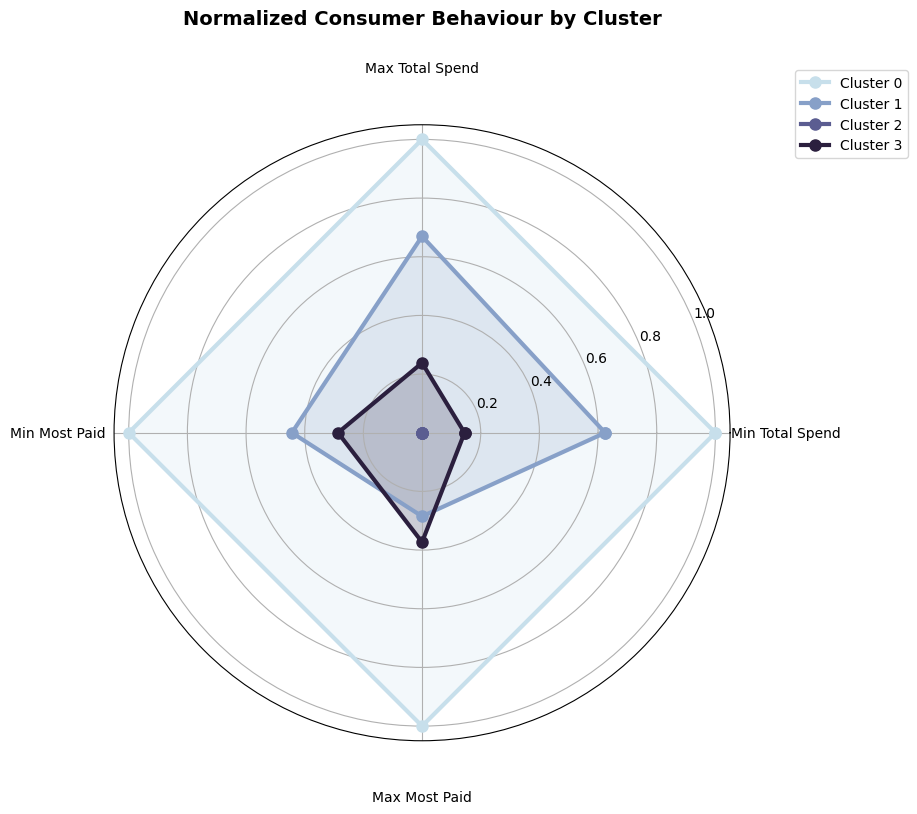

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare Data
features = cluster_means_normalized.columns

# --- 1. GENERATE COLORS ---
n_clusters = len(cluster_means_normalized.index)
# Using the same cubehelix palette you requested
custom_colors = sns.color_palette("ch:s=.25,rot=-.25", n_colors=n_clusters)

# Format labels
labels = [f.replace('_', ' ').title() for f in features]
num_features = len(features)

# Angles
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]

# Plot Setup
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], labels)
ax.tick_params(axis='x', pad=30)

# --- 2. PLOT WITH BOLDER LINES ---
for i, cluster in enumerate(cluster_means_normalized.index):
    current_color = custom_colors[i]
    values = cluster_means_normalized.loc[cluster].tolist()
    values += values[:1]

    # Changes made here:
    # 1. linewidth=3 (Thicker lines)
    # 2. markersize=8 (Larger dots)
    ax.plot(angles, values, label=f'Cluster {cluster}', 
            linewidth=3, linestyle='solid', marker='o', markersize=8, color=current_color)
    
    # 3. alpha=0.2 (Slightly more opaque fill so the shape is clearer)
    ax.fill(angles, values, alpha=0.2, color=current_color)

plt.title("Normalized Consumer Behaviour by Cluster", y=1.15, fontsize=14, fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# plt.show()

/var/folders/_p/592sd7ls08d51xhgz4s48zpw0000gn/T/ipykernel_64898/2067773984.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


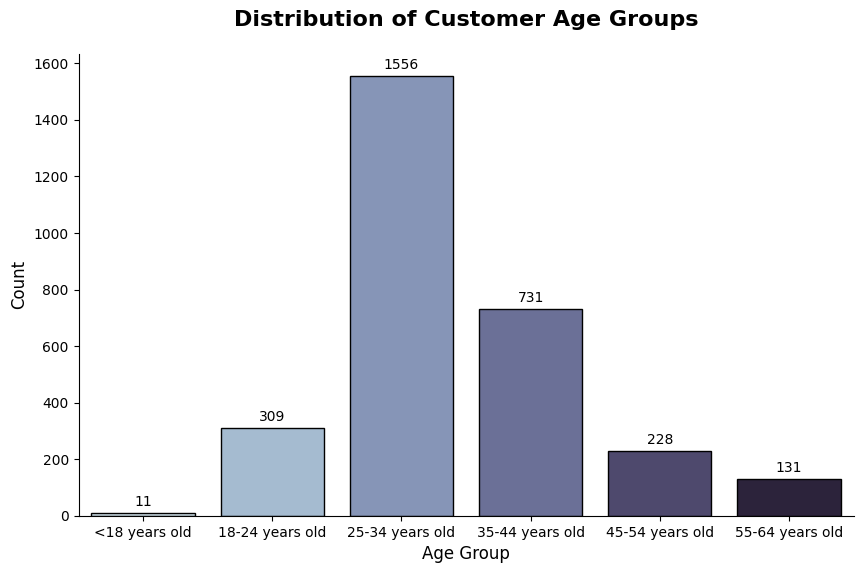

In [48]:


import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define the correct order
age_order = ['<18 years old',"18-24 years old" ,'25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old']
# Note: Check your data to ensure these labels match exactly!

# 2. Prepare Data (if you need to aggregate first)
# If data_nona is individual rows:
# counts = data_nona['age'].value_counts().reindex(age_order)

plt.figure(figsize=(10, 6))

# 3. Plot with the "Skyblue + Black Border" style
ax = sns.countplot(
    x='age',
    data=df,
    order=age_order,
    palette="ch:s=.25,rot=-.25",       # <--- Matches your Drink chart
    edgecolor='black',     # <--- Matches your Drink chart
    linewidth=1
)

# 4. Formatting
plt.title('Distribution of Customer Age Groups', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add counts on top
for container in ax.containers:
    ax.bar_label(container, padding=3)

# Clean borders
sns.despine()

plt.show()

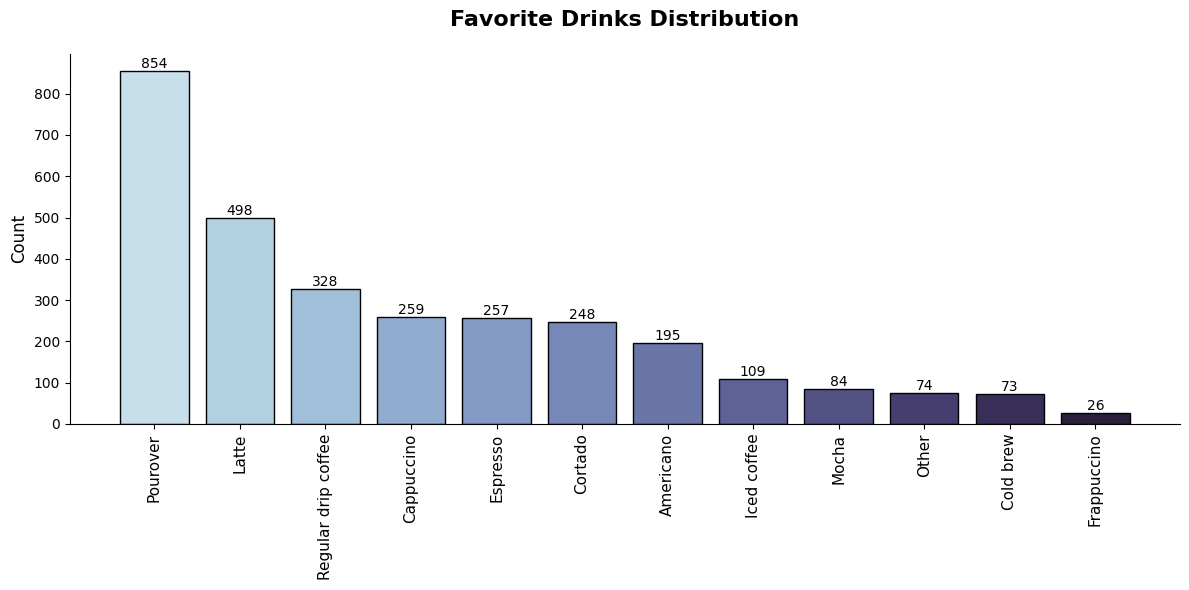

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded
df['favorite'] = df['favorite'].replace('Blended drink (e.g. Frappuccino)', 'Frappuccino')
counts = df['favorite'].value_counts()

plt.figure(figsize=(12, 6))
my_colors = sns.color_palette("ch:s=.25,rot=-.25", n_colors=len(counts))

# Store the result of plt.bar in a variable 'bars'
bars = plt.bar(
    counts.index, 
    counts.values, 
    color=my_colors,
    edgecolor='black',
    width=0.8
)

plt.title('Favorite Drinks Distribution', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, fontsize=11)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# --- Add this section to label the bars ---
# Iterate over each bar and place text above it
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X coordinate: center of the bar
        height,                             # Y coordinate: height of the bar
        f'{int(height)}',                   # The text (count)
        ha='center',                        # Horizontal alignment
        va='bottom',                        # Vertical alignment (places it just above)
        fontsize=10                         # Font size
    )
# ------------------------------------------

plt.tight_layout()
plt.savefig('favorite_drinks_labeled.png')